# Capítulo 12: Redes Antagónicas Generativas (GAN)

In [1]:
from keras.datasets import mnist

In [2]:
mnist_data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist_data

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Reshape, LeakyReLU
from keras.optimizers import Adam

In [4]:
def generador_gan():
    generador = Sequential()
    generador.add(Input(shape=(100, )))
    generador.add(Dense(128))
    generador.add(LeakyReLU(alpha=0.01))
    generador.add(Dense(28*28*1, activation='tanh'))
    generador.add(Reshape((28,28,1)))
    return generador

In [5]:
model_generador = generador_gan()
print(model_generador.summary())

C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,064 (445.56 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
def discriminador_gan():
    discriminador = Sequential()
    discriminador.add(Input(shape=(28,28,1)))
    discriminador.add(Flatten())
    discriminador.add(Dense(128))
    discriminador.add(LeakyReLU(alpha=0.01))
    discriminador.add(Dense(1, activation='sigmoid'))
    return discriminador

In [11]:
model_discriminador = discriminador_gan()
model_discriminador.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#combinando el generador y discriminador para formar el modelo GAN
def gan_combinado(generador, discriminador):
    modelo_combinado = Sequential()
    modelo_combinado.add(generador)
    modelo_combinado.add(discriminador)
    return modelo_combinado

In [13]:
model_discriminador.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])
model_discriminador.trainable = False

modelo_gan_combinado = gan_combinado(model_generador, model_discriminador)
modelo_gan_combinado.compile(loss="binary_crossentropy", optimizer=Adam())
modelo_gan_combinado.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 28, 28, 1)           │         114,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 1)                   │         100,609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,673 (838.57 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 100,609 (393.00 KB)

In [14]:
import numpy as  np

def entrenamiento_gan():

    n_iteraciones = 10000
    tam_lote = 128
    salto = 1000

    mnist_data = mnist.load_data()
    (X_train, y_train), (X_test, y_test) = mnist_data

    X_train = X_train/127.5-1

    X_train = np.expand_dims(X_train, axis=3)

    etiquetas_imgs_reales = np.ones((tam_lote,1))
    etiquetas_imgs_falsas = np.zeros((tam_lote,1))

    for num_iter in range(n_iteraciones):

        num_aleatorios = np.random.randint(0, X_train.shape[0], tam_lote)
        images_reales = X_train[num_aleatorios]

        #entrenamos al discriminador con imágenes reales y obtenga el valor de pérdida y precisión
        eval_discriminador_imgs_reales = model_discriminador.train_on_batch(images_reales, etiquetas_imgs_reales)

        #Creamos un vector de 100 elementos de ruido aleatorio
        vector_ruido_aleatorio = np.random.normal(0,1,(tam_lote,100))
        # obtenemos un lote de imágenes falsas a partir del vector de ruido aleatorio
        imgs_falsas = model_generador.predict(vector_ruido_aleatorio)

        #entrenamos al discriminador con imágenes falsas y obtenga el valor de pérdida y precisión
        eval_discriminador_imgs_falsas = model_discriminador.train_on_batch(imgs_falsas, etiquetas_imgs_falsas)

        #encuentre el valor promedio de pérdida y precisión dividiendo el total de valores reales y falsos por 2
        perdida_discriminador, exactitud_discriminador = 0.5 * np.add(eval_discriminador_imgs_reales, eval_discriminador_imgs_falsas)

        #Creamos un vector de 100 elementos de ruido aleatorio
        vector_ruido_aleatorio2 = np.random.normal(0,1,(tam_lote,100))

        #entrenamos el gan combinado con vectores de ruido aleatorios y etiquetas de imágenes reales
        #Dado que mantenemos el discriminador constante, necesitamos que la GAN piense que todas las imágenes que genera
        # ya están clasificadas por el discriminador como reales.
        perdida_generador = modelo_gan_combinado.train_on_batch(vector_ruido_aleatorio2, etiquetas_imgs_reales)

        print("Iteration: %d" %(num_iter+1))

        if (num_iter+1)%salto == 0:

            print("Iteración: %d - Exactitud del discriminador: %.2f" %(num_iter+1 , exactitud_discriminador*100))

            #serializar la estructura del modelo del generador
            model_json = model_generador.to_json()
            #guardamos el json serializado
            with open("modelo_gan_generado.json","w") as json_file:
                json_file.write(model_json)

            #serializamos los pesos del modelo del generador como archivo hdf5
            model_generador.save_weights("modelo_gan_generado.weights.h5")

In [15]:
def dibujar_muestra(modelo):
    ruido = np.random.normal(0,1,(4*4,100))
    imgs_generadas = modelo.predict(ruido)
    imgs_generadas = 0.5*imgs_generadas+0.5
    figure, axes = plt.subplots(4,4, figsize=(4,4), sharey=True, sharex=True)

    counter = 0
    for i in range(4):
        for j in range(4):
            axes[i, j].imshow(imgs_generadas[counter, :,:,0], cmap='gray')
            axes[i, j].axis('off')
            counter += 1
    plt.show()

In [16]:
entrenamiento_gan()

C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Iteration: 1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 7
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 9
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 11
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 12
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 13
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 14
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 16
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 17
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 18
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 19
4/4 ━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 79
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 81
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 82
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 83
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 84
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 85
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 86
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 87
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 88
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 89
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 91
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 92
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 93
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 94
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 95
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 96
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 97
4/4 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 173
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 174
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 175
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 176
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 177
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 178
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 179
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 181
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 182
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 183
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 184
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 185
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 186
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 187
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 188
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 189
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 190
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 267
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 268
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 269
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 270
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 271
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 272
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 273
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 274
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 275
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 276
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 277
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 278
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 279
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 280
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 281
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 282
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 283
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 284
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 361
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 362
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 363
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 364
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 365
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 366
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 367
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 368
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 369
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 370
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 371
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 372
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 373
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 374
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 375
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 376
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 377
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 378
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 455
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 456
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Iteration: 457
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 458
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 459
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 460
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 461
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 462
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 463
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 464
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 465
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 466
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 467
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 468
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 469
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 470
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 471
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 472
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 549
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 550
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 551
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 552
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 553
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 554
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 555
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 556
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 557
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 558
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 559
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 560
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 561
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 562
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 563
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 564
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 565
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 566
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 643
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 644
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 645
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 646
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 647
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 648
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 649
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 650
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 651
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 652
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 653
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 654
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 655
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 656
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 657
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 658
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 659
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 660
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 738
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 739
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 740
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 741
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 742
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 743
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 744
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 745
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 746
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 747
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 748
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 749
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 750
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 751
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 752
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 753
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 754
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 831
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 832
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 833
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 834
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 835
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 836
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 837
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 838
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Iteration: 839
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 840
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 841
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 842
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 843
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 844
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 845
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 846
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 847
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 848
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteratio

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 925
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 926
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 927
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 928
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 929
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 930
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 931
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 932
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 933
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 934
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 935
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Iteration: 936
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 937
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 938
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 939
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 940
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 941
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 942
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iterati

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1018
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1019
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1020
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1021
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1022
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1023
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1024
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1025
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1026
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1028
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1029
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1030
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1031
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1032
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1033
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1034
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1035
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1111
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1112
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1113
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1114
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1115
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1116
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1117
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1118
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1119
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1121
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1122
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1123
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1124
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1125
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1126
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1127
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1204
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1205
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1206
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1207
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1208
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1209
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1210
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1211
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1212
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1213
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1214
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1215
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1216
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1217
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1218
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1219
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1220
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1221
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1297
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1298
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1299
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1301
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1302
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1303
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1304
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1305
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1306
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1307
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1308
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1309
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1310
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1311
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1312
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1313
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1314
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1390
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1391
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1392
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1393
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1394
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1395
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1396
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Iteration: 1397
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1398
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1399
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1401
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1402
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1403
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1404
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1405
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1406
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1407
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1483
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1484
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1485
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1486
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1487
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Iteration: 1488
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1489
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1490
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1491
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1492
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1493
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1494
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1495
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1496
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1497
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1498
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1499
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1576
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1577
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1578
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1579
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1580
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1581
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1582
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1583
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1584
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1585
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1586
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1587
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1588
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1589
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1590
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1591
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Iteration: 1592
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1593
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Iteration: 1669
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1670
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1671
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1672
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1673
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1674
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1675
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1676
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1677
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1678
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1679
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1680
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1681
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1682
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1683
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1684
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1685
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1686
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1762
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1763
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1764
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1765
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1766
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Iteration: 1767
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1768
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Iteration: 1769
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1770
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1771
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1772
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1773
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1774
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1775
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1776
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1777
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1778
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1779
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1855
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Iteration: 1856
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1857
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1858
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1859
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1860
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1861
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1862
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1863
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1864
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1865
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1866
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Iteration: 1867
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1868
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1869
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1870
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Iteration: 1871
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Iteration: 1872
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

MemoryError: bad allocation

1/1 [==============================] - 0s 64ms/step


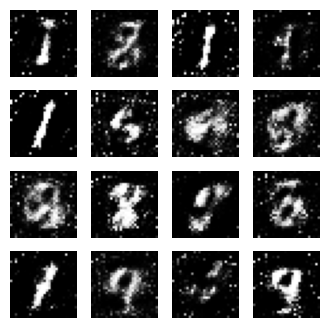

In [20]:
from keras.models import model_from_json
import numpy as  np
import matplotlib.pyplot as plt

#cargamos el archivo json
archivo_modelo_json = open("modelo_gan_generado.json","r")
modelo_json = archivo_modelo_json.read()
archivo_modelo_json.close()

#creamos el modelo json
modelo_gan = model_from_json(modelo_json)

#cargamos los pesos del modelo
modelo_gan.load_weights("modelo_gan_generado.weights.h5")

#generar imágenes aleatorias generadas por nuestro modelo
dibujar_muestra(modelo_gan)
